TypeError: Input z must be at least a (2, 2) shaped array, but has shape (0, 0)

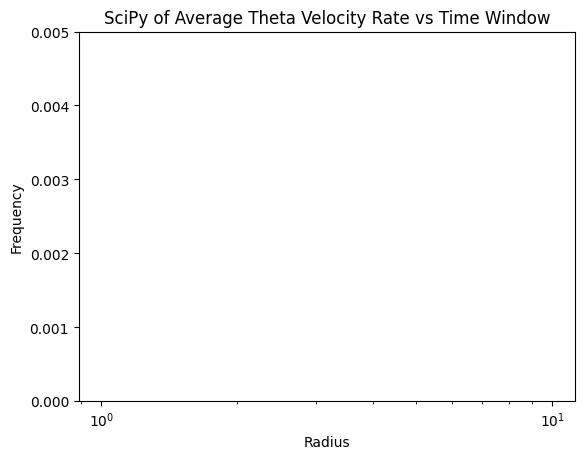

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.fft import fft, fftfreq, rfftfreq, rfft
import pandas as pd

df = pd.read_csv('/workspaces/Variability-in-Black-Holes/data/AvgVtheta', sep = '\t', header=None, names = ['time', 'radius', 'mdot'])

df = df.loc[df['radius'] == 2.00393e+00]
time1 = np.linspace(0, 371, 372)
time2 = np.linspace(200, 571, 372)
fft_data = []
fftls_data = []

freq = rfftfreq(201, 100)

def main(min, max, df):
  df = df.loc[(df['time'] >= min) & (df['time'] <= max)]
  variable_array = np.array(df['mdot'])
  power = rfft(variable_array)
  fft_data.append(power)
  frequency, power2 = LombScargle(df['time'], variable_array).autopower()
  fftls_data.append(power2)


fft_df = pd.DataFrame(fft_data)
fft_df = fft_df.transpose()
fftls_df = pd.DataFrame(fftls_data)
fftls_df = fftls_df.transpose()


plt.figure()
plt.title('SciPy of Average Theta Velocity Rate vs Time Window')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.ylim(0, 0.005)
plt.xscale('log')
plt.contourf(time1, freq, np.log(fft_df), cmap='YlGn', extend = 'both', levels = 200)
plt.xscale('log')
plt.colorbar(label = 'Power')
plt.show()

plt.figure()
plt.title('LombScargle of Average Theta Velocity Rate vs Time Window')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.ylim(0, 0.005)
plt.xscale('log')
plt.contourf(time1, freq, np.log(fftls_df), cmap='YlGn', extend = 'both', levels = 200)
plt.xscale('log')
plt.colorbar(label = 'Power')
plt.show()

#change times to liking !

for time1, time2 in zip(time1, time2):
  main(time1, time2, df)



2.00393e+00